In [1]:
#Grafiken
#Biblothek erstellen
!pip install matplotlib pandas


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.colors as mcolors
import seaborn as sns
from matplotlib.patches import Patch
import zipfile
import os
import geopandas as gpd
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable



In [3]:
df = pd.read_csv("merged.csv")

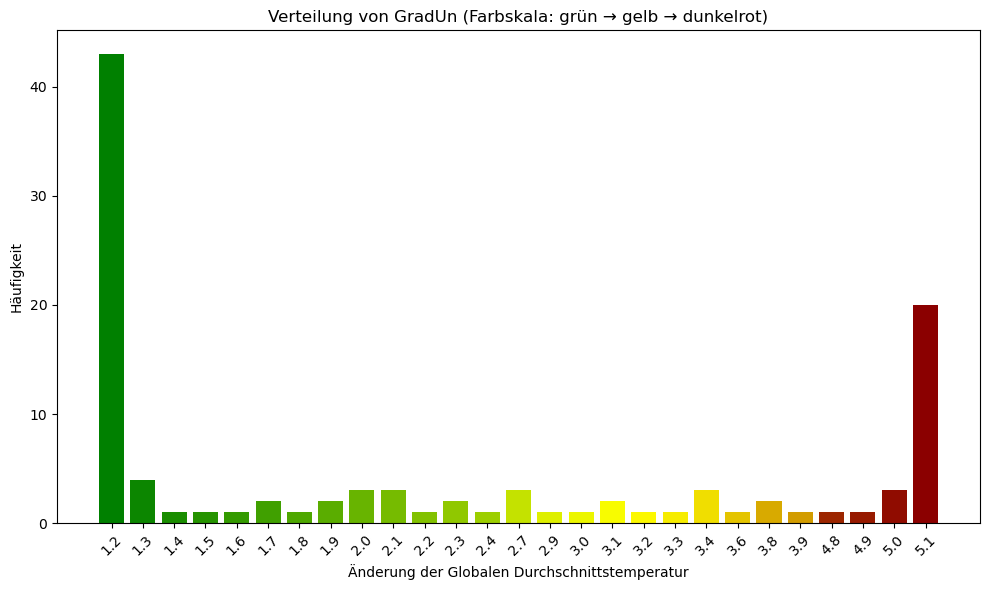

In [4]:

# Häufigkeiten berechnen und sortieren
gradun_counts = df['GRadUn'].value_counts().sort_index()

# Normierung für Farbverlauf
norm = mcolors.Normalize(vmin=gradun_counts.index.min(), vmax=gradun_counts.index.max())

# Farbverlauf definieren: grün → gelb → rot
cmap = mcolors.LinearSegmentedColormap.from_list("green_yellow_red", ["green", "yellow", "darkred"])

colors = [cmap(norm(val)) for val in gradun_counts.index]

# Balkendiagramm erstellen
plt.figure(figsize=(10, 6))
bars = plt.bar(gradun_counts.index.astype(str), gradun_counts.values, color=colors)

plt.xlabel("Änderung der Globalen Durchschnittstemperatur")
plt.ylabel("Häufigkeit")
plt.title("Verteilung von GradUn (Farbskala: grün → gelb → dunkelrot)")
plt.xticks(rotation=45)
plt.tight_layout()
#Grafik erstellen
plt.savefig("gradun_balkendiagramm.png", dpi=300)

#Grafik anzeigen
plt.show()

In [5]:
df2 = pd.read_csv("NEWmergedpop.csv")

In [6]:
#Country Groups darstellen als Tabelle



# Gruppierung und Berechnung
classification_summary = df2['Income group'].value_counts().reset_index()
classification_summary.columns = ['Income group', 'Anzahl']

# Prozentuale Verteilung hinzufügen
classification_summary['Prozent'] = (classification_summary['Anzahl'] / classification_summary['Anzahl'].sum()) * 100

# Prozent auf zwei Nachkommastellen runden (optional)
classification_summary['Prozent'] = classification_summary['Prozent'].round(2)

# Ergebnis anzeigen
print(classification_summary)


          Income group  Anzahl  Prozent
0  Lower middle income      44    38.26
1  Upper middle income      41    35.65
2           Low income      22    19.13
3          High income       8     6.96


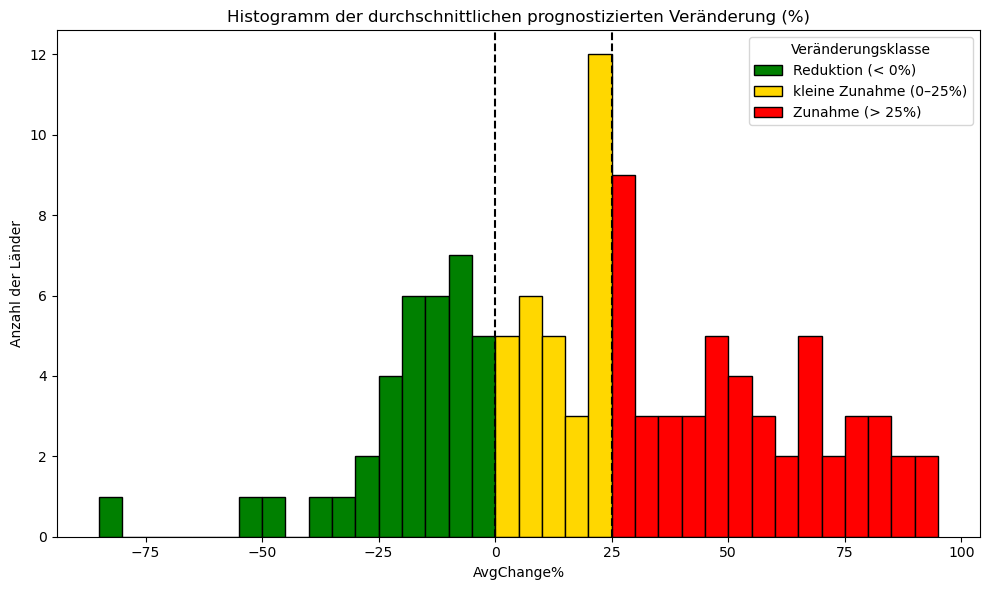

In [7]:
# Datenbereich und Bin-Breite
min_val = np.floor(df["AvgChange%"].min() / 5) * 5
max_val = np.ceil(df["AvgChange%"].max() / 5) * 5
bin_width = 5

# Starte mit Standard-Bins (z. B. -85, -80, ..., 90)
bins = np.arange(min_val, max_val + bin_width, bin_width)

# Stelle sicher, dass 0 und 25 als Grenzwerte enthalten sind
if 0 not in bins:
    bins = np.sort(np.append(bins, 0))
if 25 not in bins:
    bins = np.sort(np.append(bins, 25))

# Histogramm berechnen
counts, bin_edges = np.histogram(df["AvgChange%"], bins=bins)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

# Farben je nach Mittelwert der Bin
colors = []
for center in bin_centers:
    if center < 0:
        colors.append("green")
    elif center <= 25:
        colors.append("gold")
    else:
        colors.append("red")

# Plot
plt.figure(figsize=(10, 6))
plt.bar(bin_centers, counts, width=np.diff(bin_edges), color=colors, edgecolor='black')

# Achsentitel und Hilfslinien
plt.title("Histogramm der durchschnittlichen prognostizierten Veränderung (%)")
plt.xlabel("AvgChange%")
plt.ylabel("Anzahl der Länder")
plt.axvline(0, color='black', linestyle='--')
plt.axvline(25, color='black', linestyle='--')

# Legende
legend_elements = [
    Patch(facecolor='green', edgecolor='black', label='Reduktion (< 0%)'),
    Patch(facecolor='gold', edgecolor='black', label='kleine Zunahme (0–25%)'),
    Patch(facecolor='red', edgecolor='black', label='Zunahme (> 25%)')
]
plt.legend(handles=legend_elements, title="Veränderungsklasse")

plt.tight_layout()
plt.savefig("AVGHistogramm.png", dpi=300)
plt.show()


In [8]:
#Benötigt um eigene Weltkarten zu erstellen

# Pfad zur ZIP-Datei (anpassen, falls nötig)
zip_path = "ne_110m_admin_0_countries.zip"

# Zielverzeichnis
extract_to = "worldmap_data"

# Entpacken
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

# Zeige die entpackten Dateien zur Kontrolle
os.listdir(extract_to)


['ne_110m_admin_0_countries.prj',
 'ne_110m_admin_0_countries.README.html',
 'ne_110m_admin_0_countries.shx',
 'ne_110m_admin_0_countries.shp',
 'ne_110m_admin_0_countries.cpg',
 'ne_110m_admin_0_countries.dbf',
 'ne_110m_admin_0_countries.VERSION.txt']

In [9]:

# Lade Weltkarte aus entpacktem Ordner
world = gpd.read_file(os.path.join(extract_to, "ne_110m_admin_0_countries.shp"))

# Vorschau
world.head()


,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312..."


In [10]:
df = pd.read_csv("NEWmergedpop.csv")
#zusammenmergen
merged = world.merge(df, left_on="SOV_A3", right_on="ISO3", how="left")



In [11]:
print(merged)

          featurecla  scalerank  LABELRANK                   SOVEREIGNT  \
0    Admin-0 country          1          6                         Fiji   
1    Admin-0 country          1          3  United Republic of Tanzania   
2    Admin-0 country          1          7               Western Sahara   
3    Admin-0 country          1          2                       Canada   
4    Admin-0 country          1          2     United States of America   
..               ...        ...        ...                          ...   
172  Admin-0 country          1          5           Republic of Serbia   
173  Admin-0 country          1          6                   Montenegro   
174  Admin-0 country          1          6                       Kosovo   
175  Admin-0 country          1          5          Trinidad and Tobago   
176  Admin-0 country          1          3                  South Sudan   

    SOV_A3  ADM0_DIF  LEVEL               TYPE TLC  \
0      FJI         0      2  Sovereign countr

<Figure size 1500x1000 with 0 Axes>

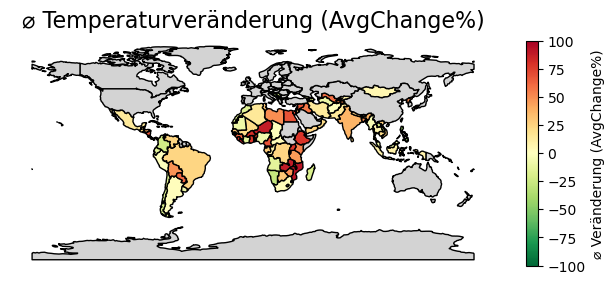

In [12]:

#Grafik erstellen 
plt.figure(figsize=(15, 10))
merged.plot(
    column="AvgChange%",
    cmap="RdYlGn_r",
    legend=True,
    legend_kwds={"label": "⌀ Veränderung (AvgChange%)", "shrink": 0.5},
    vmin=-100,
    vmax=100,
    edgecolor="black",
    missing_kwds={"color": "lightgrey", "label": "Keine Daten"}
)

plt.title("⌀ Temperaturveränderung (AvgChange%)", fontsize=16)
plt.axis("off")
plt.tight_layout()
#Grafik speichern
plt.savefig("avggrad_map.png", dpi=300, bbox_inches="tight")

#Grafik anzeigen
plt.show()


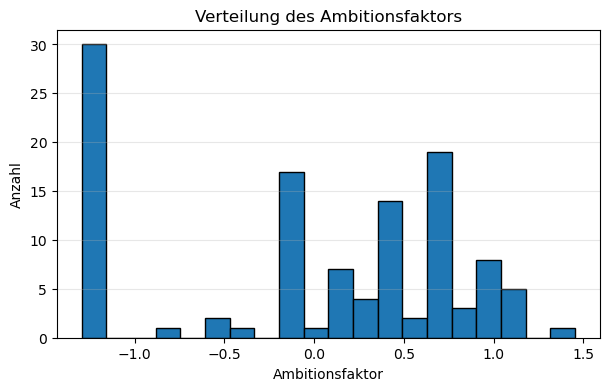

In [13]:

#Ambitionsfaktorgrafik testweise erstellen 
plt.figure(figsize=(7,4))
plt.hist(df2['Ambitionsfaktor'], bins=20, edgecolor='black')
plt.title('Verteilung des Ambitionsfaktors')
plt.xlabel('Ambitionsfaktor')
plt.ylabel('Anzahl')
plt.grid(axis='y', alpha=0.3)
plt.show()


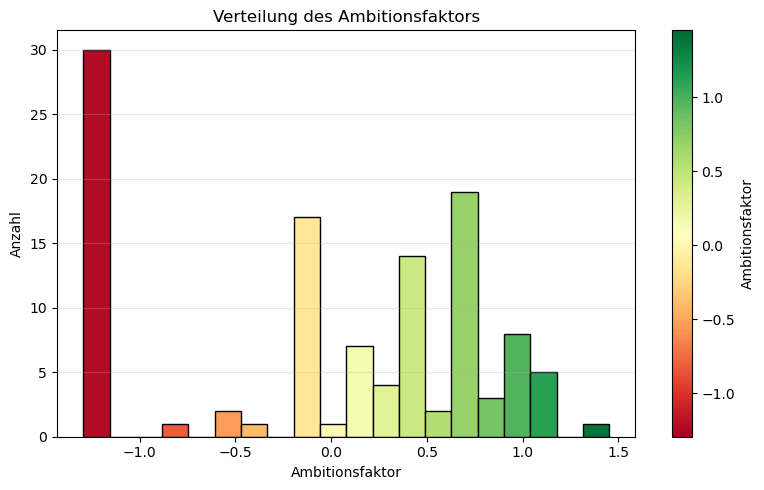

In [15]:
#Ambitionsfaktor farblich darstellen
# data = df2['Ambitionsfaktor'].dropna().sort_values()
data = df2['Ambitionsfaktor'].dropna()

# Colormap
cmap = plt.get_cmap("RdYlGn")
norm = Normalize(vmin=data.min(), vmax=data.max())

fig, ax = plt.subplots(figsize=(8, 5))
n, bins, patches = ax.hist(data, bins=20, edgecolor='black')

# Balken einfärben
for patch, left, right in zip(patches, bins[:-1], bins[1:]):
    color = cmap(norm((left + right) / 2))
    patch.set_facecolor(color)

ax.set_title('Verteilung des Ambitionsfaktors')
ax.set_xlabel('Ambitionsfaktor')
ax.set_ylabel('Anzahl')
ax.grid(axis='y', alpha=0.3)

# Richtige Colorbar mit Bezug zur Achse
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Workaround, damit keine Warnung kommt
cbar = fig.colorbar(sm, ax=ax, label='Ambitionsfaktor')

plt.tight_layout()
plt.savefig("aFaktor.png", dpi=300)
plt.show()
